# Matrix Factorizations

In [1]:
using LinearAlgebra
using Plots

#### Vectors and matrices have become the language to know

In [2]:
Symmetric_matrix = [
     2 -1  0  0;
    -1  2 -1  0;
     0 -1  2 -1;
     0  0 -1  2
]
display(Symmetric_matrix)

4×4 Matrix{Int64}:
  2  -1   0   0
 -1   2  -1   0
  0  -1   2  -1
  0   0  -1   2

In [3]:
Orthogonal_matrix = [
     1  1  1  1;
     1 -1  1 -1;
     1  1 -1 -1;
     1 -1 -1  1
]
display( 1/2 * Orthogonal_matrix)

4×4 Matrix{Float64}:
 0.5   0.5   0.5   0.5
 0.5  -0.5   0.5  -0.5
 0.5   0.5  -0.5  -0.5
 0.5  -0.5  -0.5   0.5

In [4]:
Triangular_matrix = [
     1  1  1  1;
     0  1  1  1;
     0  0  1  1;
     0  0  0  1
]
display(Triangular_matrix)

4×4 Matrix{Int64}:
 1  1  1  1
 0  1  1  1
 0  0  1  1
 0  0  0  1

In [5]:
# Define a square matrix A
A = [2.0  1.0 -1.0; 
    -3.0 -1.0  2.0; 
    -2.0  1.0  2.0
]
display(A)

3×3 Matrix{Float64}:
  2.0   1.0  -1.0
 -3.0  -1.0   2.0
 -2.0   1.0   2.0

#### $A = LU$

Original Matrix A:


3×3 Matrix{Float64}:
  2.0   1.0  -1.0
 -3.0  -1.0   2.0
 -2.0   1.0   2.0


Lower Triangular Matrix L:


3×3 Matrix{Float64}:
  1.0       0.0  0.0
  0.666667  1.0  0.0
 -0.666667  0.2  1.0


Upper Triangular Matrix U:


3×3 Matrix{Float64}:
 -3.0  -1.0      2.0
  0.0   1.66667  0.666667
  0.0   0.0      0.2


Matrix LU:


LinearAlgebra.LU{Float64, Matrix{Float64}, Vector{Int64}}
L factor:
3×3 Matrix{Float64}:
  1.0       0.0  0.0
  0.666667  1.0  0.0
 -0.666667  0.2  1.0
U factor:
3×3 Matrix{Float64}:
 -3.0  -1.0      2.0
  0.0   1.66667  0.666667
  0.0   0.0      0.2

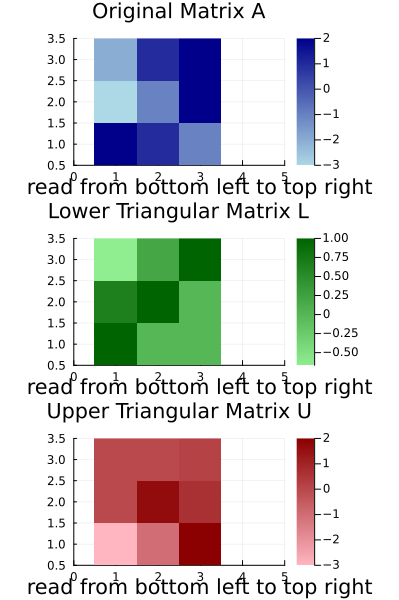

In [6]:
# Perform LU decomposition
LU = lu(A)

# Extract the lower triangular matrix L and upper triangular matrix U
L = LU.L
U = LU.U;

# Display the original matrix A, L, and U
println("Original Matrix A:")
display(A)

println("\nLower Triangular Matrix L:")
display(L)
println("\nUpper Triangular Matrix U:")
display(U)

println("\nMatrix LU:")
display(LU)

plot(
    heatmap(A, color=:auto, aspect_ratio=:equal, title="Original Matrix A", c=:blues)
    , heatmap(L, color=:auto, aspect_ratio=:equal, title="Lower Triangular Matrix L", c=:greens)
    , heatmap(U, color=:auto, aspect_ratio=:equal, title="Upper Triangular Matrix U", c=:reds)
    , layout = (3, 1), size = (400, 600) 
    , xlims = ( 0, 5 )
    , annotate = (3,0, "read from bottom left to top right")
)

#### $A = LDU$

Original Matrix A:


3×3 Matrix{Float64}:
  2.0   4.0  -2.0
  4.0   9.0  -3.0
 -2.0  -3.0   7.0


Lower Triangular Matrix L:


3×3 Matrix{Float64}:
  1.0   0.0       0.0
 -0.5   1.0       0.0
  0.5  -0.333333  1.0


Diagonal Matrix D:


3×3 Diagonal{Float64, Vector{Float64}}:
 4.0   ⋅    ⋅ 
  ⋅   1.5   ⋅ 
  ⋅    ⋅   1.33333


Upper Triangular Matrix U:


3×3 Matrix{Float64}:
 4.0  9.0  -3.0
 0.0  1.5   5.5
 0.0  0.0   1.33333


Reconstructed Matrix A:


3×3 Matrix{Float64}:
 16.0   36.0   -12.0
 -8.0  -15.75   14.25
  8.0   17.25   -6.97222

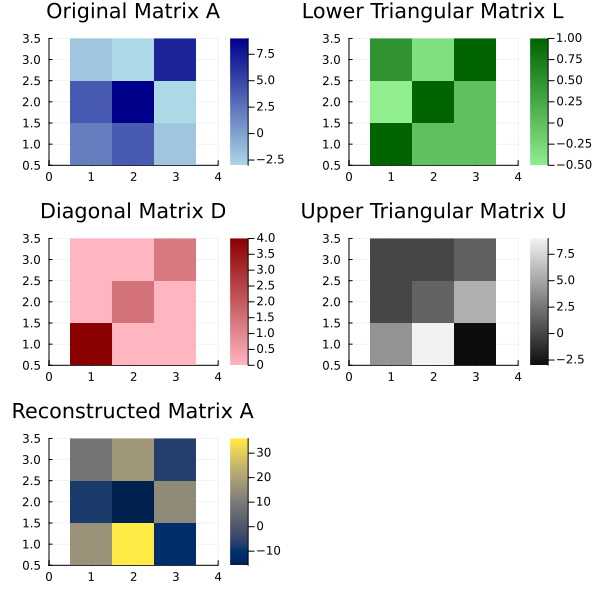

In [7]:
# Define a square matrix A
A = [2.0  4.0 -2.0;
     4.0  9.0 -3.0;
    -2.0 -3.0  7.0]

# Perform LU decomposition with partial pivoting
L, U, P = lu(A, Val(true))

# Compute the diagonal matrix D (D is diagonal with elements from U)
D = Diagonal(U)

# Reconstruct A using L, D, and U
Rₐ = L * D * U;

# Display the original matrix A, L, D, U, and the reconstructed A
println("Original Matrix A:")
display(A)
println("\nLower Triangular Matrix L:")
display(L)
println("\nDiagonal Matrix D:")
display(D)
println("\nUpper Triangular Matrix U:")
display(U)
println("\nReconstructed Matrix A:")
display(Rₐ)

# Display the plots
plot(
      heatmap(A, color=:auto, aspect_ratio=:equal, title="Original Matrix A", c=:blues)
    , heatmap(L, color=:auto, aspect_ratio=:equal, title="Lower Triangular Matrix L", c=:greens)
    , heatmap(D, color=:auto, aspect_ratio=:equal, title="Diagonal Matrix D", c=:reds)
    , heatmap(U, color=:auto, aspect_ratio=:equal, title="Upper Triangular Matrix U", c=:grays)
    , heatmap(Rₐ, color=:auto, aspect_ratio=:equal, title="Reconstructed Matrix A", c=:cividis)
    , layout = (3 , 2)
    , xlims = (0,4)
    , size = (600,600)
)

#### P A = LU

Original Matrix A:


3×3 Matrix{Float64}:
  2.0   4.0  -2.0
  4.0   9.0  -3.0
 -2.0  -3.0   7.0


Permutation Matrix P:


3×3 Matrix{Float64}:
  1.0   0.0       0.0
 -0.5   1.0       0.0
  0.5  -0.333333  1.0


Lower Triangular Matrix L:


3×3 Matrix{Float64}:
 4.0  9.0  -3.0
 0.0  1.5   5.5
 0.0  0.0   1.33333


Upper Triangular Matrix U:


3-element Vector{Int64}:
 2
 3
 1


Reconstructed Matrix A:


3-element Vector{Float64}:
 32.0
 -6.0
 14.0

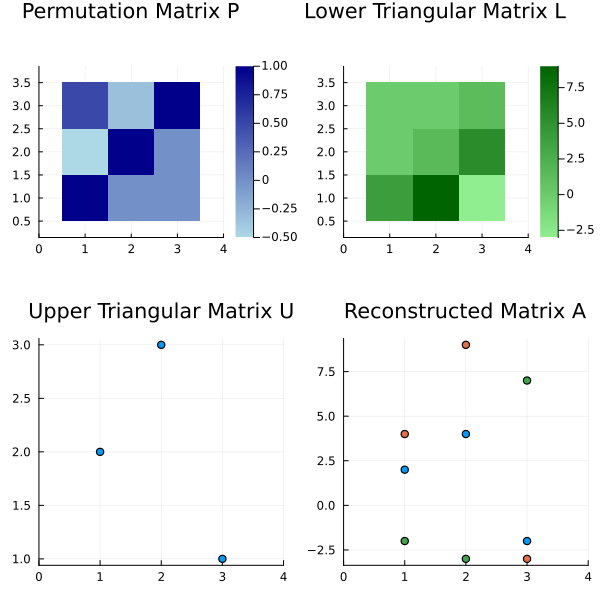

In [8]:
# Perform LU decomposition with row permutation
P, L, U = lu(A)

# Reconstruct A using P, L, and U
Rₐ = P * L * U

# Display the original matrix A, P, L, U, and the reconstructed A
println("Original Matrix A:")
display(A)
println("\nPermutation Matrix P:")
display(P)
println("\nLower Triangular Matrix L:")
display(L)
println("\nUpper Triangular Matrix U:")
display(U)
println("\nReconstructed Matrix A:")
display(Rₐ)

# Create heatmap plots for P, L, and U (P is a permutation matrix)
plot(
      heatmap(P, color=:auto, aspect_ratio=:equal, title="Permutation Matrix P", c=:blues)
    , heatmap(L, color=:auto, aspect_ratio=:equal, title="Lower Triangular Matrix L", c=:greens)
    , scatter(U, title="Upper Triangular Matrix U")
    , scatter(A, title="Reconstructed Matrix A")
    , xlims = (0,4)
    , size = (600,600)
    , legend = :none
)

In [69]:
∑ = sum

sum (generic function with 15 methods)

Original Matrix A:


3×3 Matrix{Float64}:
  2.0   4.0  -2.0
  4.0   9.0  -3.0
 -2.0  -3.0   7.0


Eigenvector Matrix X:


3×3 Matrix{Float64}:
  0.919373  0.117262  -0.375503
 -0.380032  0.511346  -0.770779
  0.101629  0.851337   0.514682


Diagonal Matrix Λ:


3×3 Diagonal{Float64, Vector{Float64}}:
 0.125476   ⋅        ⋅ 
  ⋅        4.9226    ⋅ 
  ⋅         ⋅      12.9519


Inverse of X:


3×3 Matrix{Float64}:
  0.919373  -0.380032  0.101629
  0.117262   0.511346  0.851337
 -0.375503  -0.770779  0.514682


Reconstructed Matrix A:


3×3 Matrix{Float64}:
  2.0   4.0  -2.0
  4.0   9.0  -3.0
 -2.0  -3.0   7.0


Λ's trace: 18.00000000000002 and sum of eigenvalues 18.00000000000002 are equals? true

Λ's max:


12.951919667255783

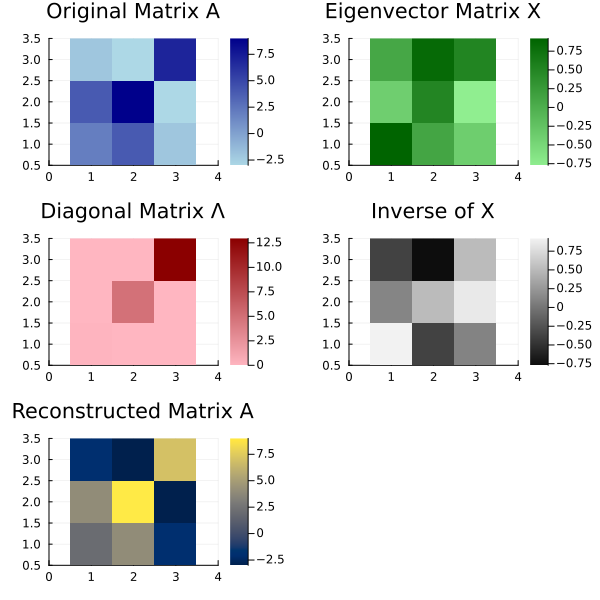

In [76]:
# Perform eigenvalue decomposition
eigen_decomposition = eigen(A)

# Extract the eigenvector matrix X and the diagonal matrix Λ
X = eigen_decomposition.vectors
# Get the diag(A)
Λ = Diagonal(eigen_decomposition.values)
# Calculate eigenvalues
λₐ = eigen_decomposition.values

# Calculate the inverse of X
X⁻¹ = inv(X)

# Reconstruct A using X, Λ, and X⁻¹
Rₐ = X * Λ * X⁻¹

# Display the original matrix A, X, Λ, X⁻¹, and the reconstructed A
println("Original Matrix A:")
display(A)
println("\nEigenvector Matrix X:")
display(X)
println("\nDiagonal Matrix Λ:")
display(Λ)
println("\nInverse of X:")
display(X⁻¹)
println("\nReconstructed Matrix A:")
display(Rₐ)

# trace and Sum of eigenvalues
trace = tr(Λ)
eigensum = ∑(λₐ)
eq = trace ==  eigensum
println("\nΛ's trace: $trace and sum of eigenvalues $eigensum are equals? $eq")

(max, i) = findmax(Λ)
println("\nΛ's max:")
display(max)


# Create a heatmap plot for A and others
plot(
      heatmap(A, color=:auto, aspect_ratio=:equal, title="Original Matrix A", c=:blues)
    , heatmap(X, color=:auto, aspect_ratio=:equal, title="Eigenvector Matrix X", c=:greens)
    , heatmap(Λ, color=:auto, aspect_ratio=:equal, title="Diagonal Matrix Λ", c=:reds)
    , heatmap(X⁻¹, color=:auto, aspect_ratio=:equal, title="Inverse of X", c=:grays)
    , heatmap(Rₐ, color=:auto, aspect_ratio=:equal, title="Reconstructed Matrix A", c=:cividis)
    , layout = (3 , 2)
    , xlims = (0,4)
    , size = (600,600)
)


In [87]:
# Define a numerical tolerance (small value)
tolerance = 1e-15

# Check if the matrices are approximately equal within the tolerance
are_equal = isapprox(transpose(X) \ X⁻¹, I, atol=tolerance)

# Display the result
println("Are (X^T \\ X⁻¹) and I approximately equal? $are_equal \n")
display(transpose(X) \ X⁻¹)

Are (X^T \ X⁻¹) and I approximately equal? true 



3×3 Matrix{Float64}:
  1.0          1.81138e-16  -1.08196e-17
  2.25597e-16  1.0           1.19895e-16
 -2.36293e-17  0.0           1.0

# References
- [ ] [Introduction to Linear Algebra, Sixth Edition (2023)](https://math.mit.edu/~gs/linearalgebra/ila6/indexila6.html)